# 🕵️‍♀️ Customer Behaviour Case Study 🕵️‍♂️

This Jupyter Notebook is a case study on customer behavior analysis. We will be analyzing customer data to gain insights into their behavior and preferences. The data used in this case study is from [Statso.io](https://statso.io/customer-behaviour-case-study/).

## 📊 Dataset Description
The dataset contains the following columns:
- 🆔 User_ID: Unique identifier for each customer.
- 👫 Gender: Gender of the customer (e.g., Male, Female).
- 🎂 Age: Age of the customer.
- 📍 Location: Location of the customer.
- 📱 Device_Type: Type of device used for browsing (e.g., Mobile, Tablet, Desktop).
- ⏱️ Product_Browsing_Time: Amount of time spent browsing products (in minutes).
- 📄 Total_Pages_Viewed: Total number of pages viewed during the browsing session.
- 🛒 Items_Added_to_Cart: Number of items added to the shopping cart.
- 💰 Total_Purchases: Total number of purchases made.

## 📈 Objectives
Your task involves:
- 👥 Understanding the distribution and characteristics of customer demographics (e.g., age, gender, location).
- 📱 Exploring how different types of devices are used by customers and their impact on behavior.
- ⏱️📄🛒 Investigating the relationship between browsing time, pages viewed, items added to the cart, and actual purchases.
- 👥 Segmenting customers based on their behavior and identifying distinct customer groups.
- 🛍️ Analyzing the customer journey and identifying potential areas for improvement in the conversion funnel.
- 💰 Assessing the impact of customer behavior on revenue generation and identifying opportunities for increasing sales and customer engagement.

## 🎯 Tasks
- 🧹 Explore and clean the data.
- 📊 Perform descriptive analysis on the data.
- 📈 Visualize the data to gain insights.
- 🤖 Build a predictive model to predict customer behavior.

## 📊 Customer Behaviour Analysis: Proposed Methodology

Customer Behaviour Analysis is a critical process that enables businesses to make informed decisions, enhance customer experiences, and maintain competitiveness in a dynamic market. Here's the methodology we propose for this task:

1. 📚 **Data Collection**: Gather data related to customer interactions. This can encompass purchase history, website visits, social media engagement, customer feedback, and more.

2. 🧹 **Data Cleaning**: Identify and rectify data inconsistencies, missing values, and outliers to ensure the quality and accuracy of the data.

3. 📈 **Descriptive Statistics**: Compute basic statistics such as mean, median, and standard deviation to summarize the data.

4. 🎨 **Data Visualization**: Create visualizations like histograms, scatter plots, and bar charts to explore trends, patterns, and anomalies in the data.

5. 🧑‍🤝‍🧑 **Customer Segmentation**: Employ techniques like clustering to group customers based on common behaviours or characteristics.

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

dataset = pd.read_csv('ecommerce_customer_data.csv')
dataset.head()


,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


In [2]:
#check for missing values
dataset.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

In [3]:
#check for outliers using iqr function
def iqr(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    return lower_bound, upper_bound


In [5]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
iqr(dataset[numeric_cols])


(User_ID                 -248.5
 Age                        8.5
 Product_Browsing_Time    -26.0
 Total_Pages_Viewed       -17.0
 Items_Added_to_Cart       -7.0
 Total_Purchases           -3.5
 dtype: float64,
 User_ID                  749.5
 Age                       44.5
 Product_Browsing_Time     86.0
 Total_Pages_Viewed        71.0
 Items_Added_to_Cart       17.0
 Total_Purchases            8.5
 dtype: float64)

In [6]:
#plotting the boxplot to check for outliers
fig = go.Figure()
for col in numeric_cols:
    fig.add_trace(go.Box(y=dataset[col], name=col))
fig.show()


In [7]:
#find the summary statistics of the dataset and plot
dataset.describe()
dataset.describe(include='object')


,Gender,Location,Device_Type
count,500,500,500
unique,2,8,3
top,Male,Kolkata,Mobile
freq,261,71,178


In [9]:
#find the summary statistics of the dataset and plot using plotly
def plotly_summary(dataset):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(dataset.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[dataset[col] for col in dataset.columns],
                   fill_color='lavender',
                   align='left'))
    ])
    fig.show()
plotly_summary(dataset)    

In [11]:
dataset.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [12]:
#distribution of the dataset
def distribution(dataset):
    fig = go.Figure()
    for col in dataset.columns:
        fig.add_trace(go.Histogram(x=dataset[col], name=col))
    fig.show()

distribution(dataset)

In [15]:
fig = px.histogram(dataset, x='Age', title='Distribution of Age')
fig.show()

In [17]:
gender_counts = dataset['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
fig = px.bar(gender_counts, x='Gender',
             y = 'Count', color= ['Green', 'Red'], title='Gender Distribution')
fig.show()

- [x] `261` males and `239` females

In [19]:
# plot 'Product_Browsing_Time' vs 'Total_Pages_Viewed'
fig = px.scatter(dataset, x='Product_Browsing_Time',
                        y = 'Total_Pages_Viewed', title = 'Product Browing Time vs Total Pages Viewed',
                        trendline='ols')
fig.show()

- [x] No consistent pattern meaning no association between time spent browsing products and the total number of pages viewed.
- [x] Indication that customers are not `necessarily exploring more pages if they spend more time on the website`

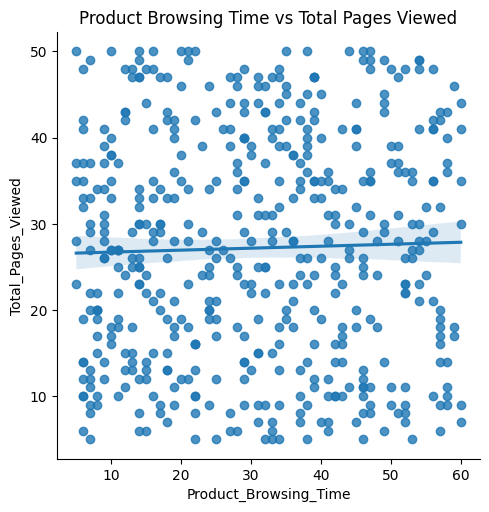

In [20]:
sns.lmplot(data=dataset, x='Product_Browsing_Time', y='Total_Pages_Viewed')
plt.title('Product Browsing Time vs Total Pages Viewed')
plt.show()

In [22]:
#grouped analysis
gender_grouped = dataset.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns = ['Gender', 'Average_Total_Pages_Viewed']
fig = px.bar(gender_grouped, x='Gender', y='Average_Total_Pages_Viewed',
             color= ['olive', 'brown'],
             title='Average Total Pages Viewed by Gender')
fig.show()

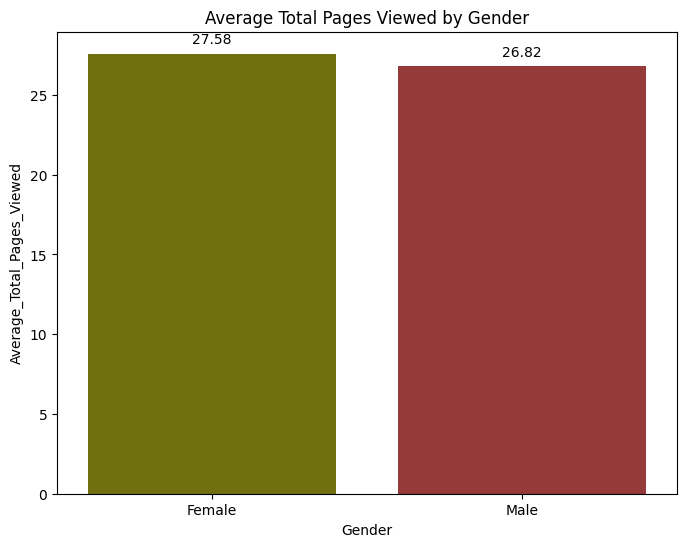

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=gender_grouped, x='Gender', y='Average_Total_Pages_Viewed', palette=['olive', 'brown'])
plt.title('Average Total Pages Viewed by Gender')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

In [25]:
devices_grouped = dataset.groupby(['Device_Type', 'Gender'])['Total_Pages_Viewed'].mean().reset_index()
devices_grouped.columns = ['Device_Type', 'Gender', 'Average_Total_Pages_Viewed']
fig = px.bar(devices_grouped, x='Device_Type', y='Average_Total_Pages_Viewed', color='Gender',
             title='Average Total Pages Viewed by Devices', animation_frame='Gender')
fig.show()

In [26]:
dataset['CLV'] = (dataset['Total_Purchases'] * dataset['Total_Pages_Viewed']) / dataset['Age']
dataset['Segment'] = pd.cut(dataset['CLV'], bins=[1, 2.5, 5, float('inf')], labels=['Low', 'Medium', 'High'])

segment_counts = dataset['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
fig = px.pie(segment_counts, values='Count', names='Segment', title='Customer Lifetime Value Segmentation')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [31]:
dataset['CLV'] = (dataset['Total_Purchases'] * dataset['Total_Pages_Viewed']) / dataset['Age']
dataset['Segment'] = pd.cut(dataset['CLV'], bins=[1, 2.5, 5, float('inf')], labels=['Low', 'Medium', 'High'])

segment_counts = dataset['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
colors = ['red','green','blue']
fig = px.bar(segment_counts, y='Count', x='Segment',color=colors, title='Customer Lifetime Value Segmentation')
fig.update_xaxes(title='Segment')
fig.update_yaxes(title='Count')
fig.show()

In [32]:
#Funnel analysis
funnel_data = dataset[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()
fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', color='Total_Purchases',
                title='Conversion Funnel')
fig.show()

- [x] graph depicting the relationship between the number of items added to the cart and the total number of purchases made.
- [x] time customers spend browsing products and the total number of purchases made.
- [x] the number of items added to the shopping cart by customers during their browsing sessions

### Churn, Churn Rate (Business Explanation)

Churn, in the context of a business, refers to the number of customers who stop using a product over a given period of time divided by the remaining number of customers. It's often referred to as customer attrition.

Churn Rate, on the other hand, is a business metric that calculates the number of customers who leave a product over a given period of time, divided by the remaining number of customers. It's often expressed as a percentage.

For example, if you start your month with 100 customers and end with 90, your churn rate is 10% because you lost 10% of your customers.

Understanding churn and churn rate is important in business and programming, especially when building models to predict customer retention and attrition.

In [33]:
dataset['Churned'] = dataset['Total_Purchases'].apply(lambda x: 1 if x == 0 else 0)
churned_counts = dataset['Churned'].value_counts().reset_index()
churned_counts.columns = ['Churned', 'Count']
fig = px.pie(churned_counts, values='Count', names='Churned', title='Churned vs Not Churned')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

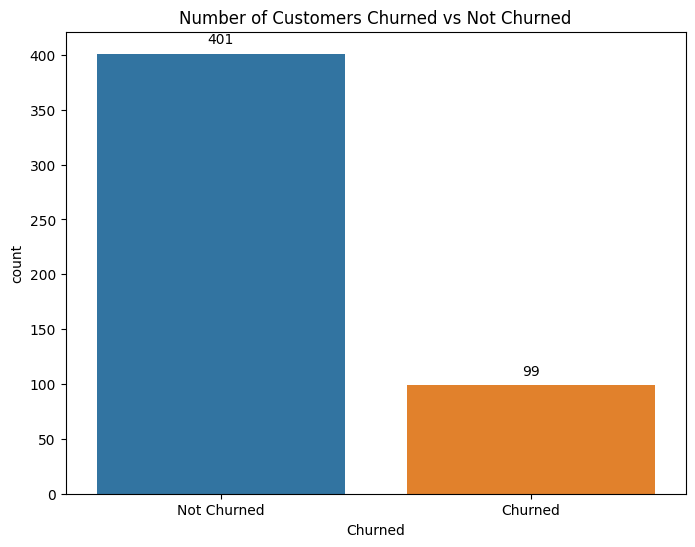

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churned', data=dataset)
plt.title('Number of Customers Churned vs Not Churned')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
ax.set_xticklabels(['Not Churned', 'Churned'])
plt.show()

### Conclusion

- [x] `401` customers churned
- [x] `99` customers did not churn
In conclusion, the advised course of action is to focus on the following areas:
- [x] Customer retention
- [x] Customer engagement
- [x] Customer satisfaction
- [x] Customer loyalty
